Pierwsze 5 wierszy danych:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0


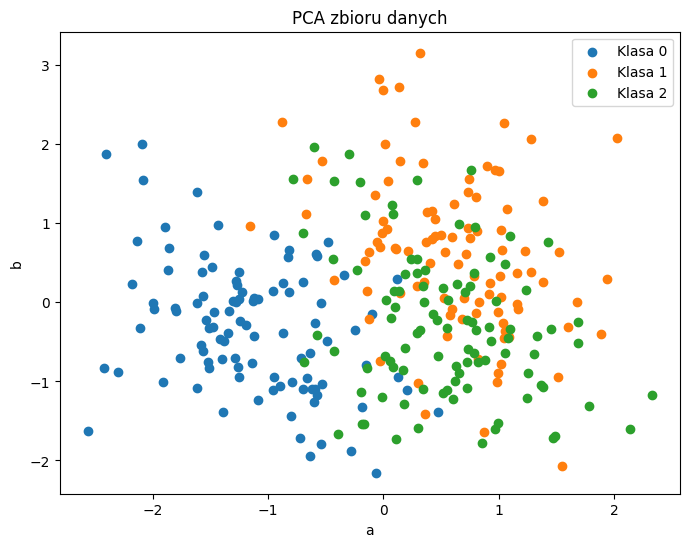


Wizualizacja oryginalnych par cech


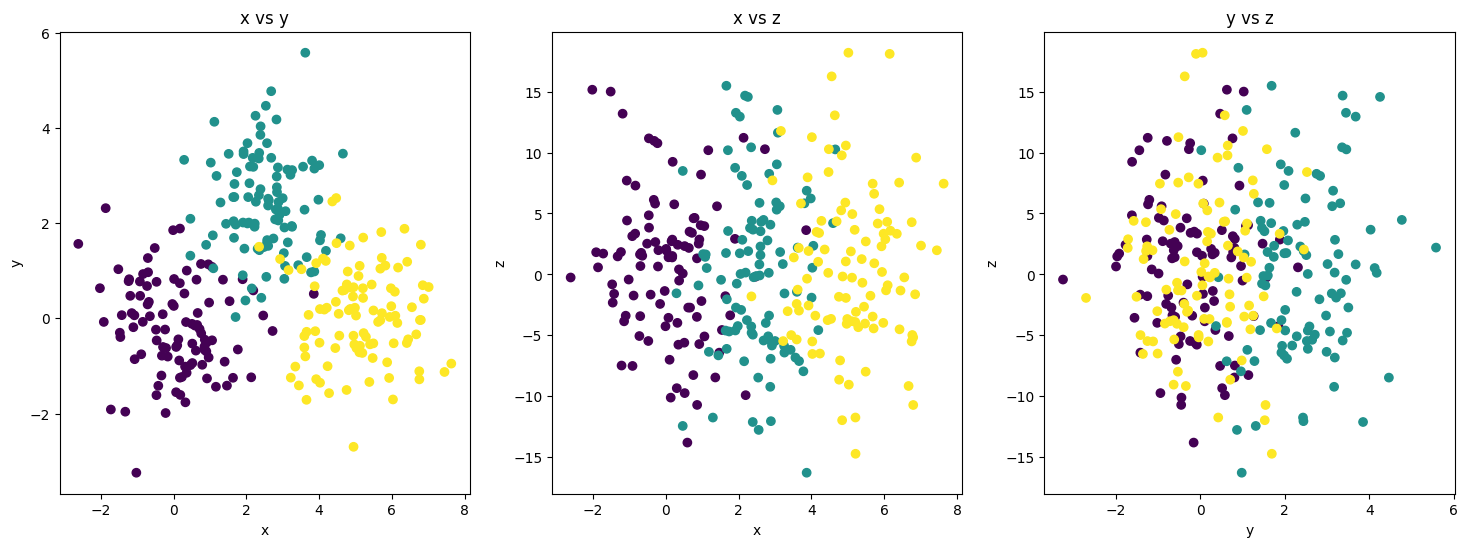


Odpowiedź na pytania:
1. Czy PCA poprawia separację klas w porównaniu z oryginalnymi cechami?
Tak, PCA często poprawia separację klas, ponieważ przekształca dane w nowy układ współrzędnych, gdzie osie (główne składowe) są wyrównane w kierunkach maksymalnej wariancji. W przestrzeni PCA klasy są często lepiej widoczne, zwłaszcza gdy oryginalne cechy są skorelowane.

2. Dlaczego standaryzacja jest konieczna przed PCA?
Standaryzacja jest konieczna, ponieważ PCA jest wrażliwe na skalę danych. Jeśli cechy są w różnych skalach, główne składowe preferują cechy o większej wariancji, co może prowadzić do błędnych wyników. Standaryzacja zapewnia, że każda cecha wnosi równy wkład do analizy.


In [4]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Link do pliku CSV
url = 'https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv'

try:
    # Pobierz plik z linku
    response = requests.get(url)
    response.raise_for_status()  # Sprawdź, czy nie ma błędów

    # Załaduj dane do Pandas
    data = pd.read_csv(StringIO(response.text))
    print("Pierwsze 5 wierszy danych:")
    print(data.head())

    # Podział na cechy i etykiety
    X = data.iloc[:, :-1].values  # Wszystkie kolumny oprócz ostatniej (cechy)
    y = data.iloc[:, -1].values   # Ostatnia kolumna (etykiety klas)

    # Standaryzacja danych
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Wykonanie PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)

    # Wizualizacja wyników PCA
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(y):
        plt.scatter(X_pca[y == cluster, 0], X_pca[y == cluster, 1], label=f'Klasa {cluster}')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('PCA zbioru danych')
    plt.legend()
    plt.show()

    # Wizualizacja oryginalnych par cech
    print("\nWizualizacja oryginalnych par cech")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # x vs y
    axes[0].scatter(X[:, 0], X[:, 1], c=y)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title('x vs y')

    # x vs z
    axes[1].scatter(X[:, 0], X[:, 2], c=y)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('z')
    axes[1].set_title('x vs z')

    # y vs z
    axes[2].scatter(X[:, 1], X[:, 2], c=y)
    axes[2].set_xlabel('y')
    axes[2].set_ylabel('z')
    axes[2].set_title('y vs z')

    plt.show()

    # Odpowiedź na pytania
    print("\nOdpowiedź na pytania:")
    print("1. Czy PCA poprawia separację klas w porównaniu z oryginalnymi cechami?")
    print("Tak, PCA często poprawia separację klas, ponieważ przekształca dane w nowy układ współrzędnych, gdzie osie (główne składowe) są wyrównane w kierunkach maksymalnej wariancji. W przestrzeni PCA klasy są często lepiej widoczne, zwłaszcza gdy oryginalne cechy są skorelowane.")

    print("\n2. Dlaczego standaryzacja jest konieczna przed PCA?")
    print("Standaryzacja jest konieczna, ponieważ PCA jest wrażliwe na skalę danych. Jeśli cechy są w różnych skalach, główne składowe preferują cechy o większej wariancji, co może prowadzić do błędnych wyników. Standaryzacja zapewnia, że każda cecha wnosi równy wkład do analizy.")

except requests.exceptions.RequestException as e:
    print(f"Błąd podczas pobierania pliku: {e}")
except Exception as e:
    print(f"Błąd podczas przetwarzania danych: {e}")